# 5. Analyse qualitative et visualisation

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

Dans cette partie, on reprend la short list d'influenceurs de la partie précédente. On cherche ensuite à voir s'ils répondent aux critères qualitatifs définis en amont, c'est-à-dire si leurs publications mentionnent un certain nombre de mots-clefs.

## Recherche de mots-clefs

In [2]:
import pandas as pd

df = pd.read_csv('posts_dataframe.csv')

df.head()

,users,post,caption,video,nb_com,nb_likes,date
0,bestofvanity,0.0,\ud83c\uddee\ud83c\uddf9 Si vous souhaitez vou...,False,6,385,2019-04-30 20:11:52
1,bestofvanity,1.0,L\u2019autre soir on a parl\u00e9 d\u2019Angle...,False,11,313,2019-04-25 10:01:55
2,bestofvanity,2.0,"Sur la C\u00f4te d\u2019Azur, il n\u2019y a pa...",False,9,402,2019-04-24 17:51:36
3,bestofvanity,3.0,\ud83c\udf3f Les jolies petites plantes des re...,False,10,476,2019-04-14 13:58:29
4,bestofvanity,4.0,\ud83c\udf74Qui vient d\u00eener ce soir ?\nPe...,False,9,263,2019-04-13 20:20:01


In [3]:
with open("shortlist_influenceurs.txt",'r') as r:    #Charger le fichier des 
    init_file=list(r)
    init_file = init_file[0]
    short_list=init_file.split('\t')
    short_list.remove(short_list[short_list.index('')])
    
keywords=[]
with open("keywords.txt",'r') as r:    #Charger le fichier contenant les mots clefs, séparés par un retour à la ligne
    #attention au formattage du fichier source
    for line in r:
        keywords.append(line)
len(short_list), len(keywords)

(74, 7)

In [4]:
key_users={}
for usr in short_list:
    captions=list(df.loc[df['users'] == usr, 'caption'])
    frequency=[]
    for caption in captions: 
        for key in keywords:
            if key in str(caption):
                frequency.append('1')
                
    frequency.append(len(captions))
    key_users[usr]=frequency
                
key_users = {k:(len(v)-1)/v[-1]*100 for k,v in key_users.items() if len(v)>1}
           

In [5]:
influenceurs= ['coline','lilibarbery','deedeeparis','bestofvanity','mangoandsalt']

for usr in influenceurs:
    key_users[usr] = 0

In [6]:
key_users  # On affiche les fréquences d'apparition d'au moins un des mots clefs dans les publications scrappées

{'anna_you_and_me': 33.33333333333333,
 'atelierdetendances': 50.0,
 'bestofvanity': 0,
 'blackwhite_loving': 25.0,
 'byopaline': 25.0,
 'coline': 0,
 'deedeeparis': 0,
 'edisaccom': 75.0,
 'lescookines': 8.333333333333332,
 'lilibarbery': 0,
 'mangoandsalt': 0,
 'mllealyb': 33.33333333333333,
 'ninaturelle': 8.333333333333332,
 'olly_lingerie': 25.0,
 'thedailyparis': 18.75}

## Visualisation

Dans cette dernière section, on propose quelques représentations graphiques des utilisateurs. L'idée est de pouvoir les distinguer qualitativement les uns en fonction des autres.

On affiche dans un premier temps l'histogramme de leur "proximité" avec les thématiques ciblées, étant comprise comme la fréquence d'apparition des mots-clefs dans les publications. Ensuite, on compare leurs métriques pour les situer les uns par rapport aux autres. 

#### Histogramme de proximité

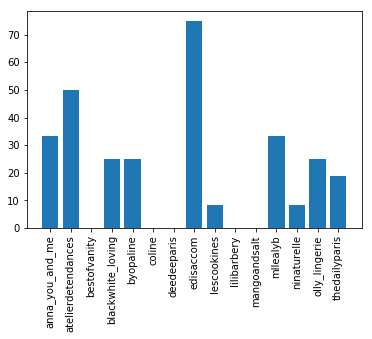

In [7]:
import matplotlib.pyplot as plt

plt.bar(list(key_users.keys()),key_users.values())
plt.xticks(rotation=90)
plt.show()

#### Comparaisons des utilisateurs

In [33]:
df2 = pd.read_csv('metrics_dataframe.csv')
column=[]
for usr in list(key_users.keys()):
    row=list(df2["user"] == usr).index(True)
    column.append(row)
df_usr=df2.loc[column]
df_usr=df_usr.drop('Unnamed: 0',axis = 1)

col_names={}
for index in column:
    col_names[index]=list(df_usr.loc[index])[0]
    
df_usr=df_usr.rename(col_names,axis = 'index')

df_usr=df_usr.drop('user',axis = 1)

df_usr

,eigen_centrality,page_centrality,engagement_comments,engagement_likes,authenticity,interaction
olly_lingerie,0.047886,0.000000,0.052861,0.498155,0.714171,0.037186
mllealyb,0.044947,0.000000,0.050302,0.365332,0.687199,0.035985
ninaturelle,0.025950,0.000007,0.002799,165.025595,0.656657,0.073231
blackwhite_loving,0.014982,0.000007,0.036313,0.195066,0.633201,0.028881
lescookines,0.025950,0.000000,0.007308,1.348112,0.635433,0.033599
atelierdetendances,0.021936,0.000000,0.022460,0.173113,0.778052,0.032972
thedailyparis,0.018997,0.000000,0.025413,3.206785,0.626153,0.042040
anna_you_and_me,0.000000,0.000006,0.012261,0.224729,1.000000,0.059675
byopaline,0.010968,0.000000,0.060725,0.208883,0.627429,0.041395
edisaccom,0.010968,0.000000,0.033671,0.121617,0.714248,0.025885


Visualiation : on refait une ACP sur nos points. 

In [9]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

# scaling the data before PCA

data = pd.DataFrame(scale(df_usr), columns=list(df_usr.columns))

# implementing PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=6).fit(data)
pca_samples = pca.transform(data)


In [10]:
# implementing PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=6).fit(data)
pca_samples = pca.transform(data)

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def pca_results(data, pca):
    
    # Dimension indexing
    dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys()) 
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (14,8))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar')
    ax.set_ylabel("Feature Weights") 
    ax.set_xticklabels(dimensions, rotation=0)

    # Display the explained variance ratios# 
    for i, ev in enumerate(pca.explained_variance_ratio_): 
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)




In [12]:
pca_results = pca_results(data, pca)

In [13]:
# creating a biplot

pca = PCA(n_components=2).fit(data)
reduced_data = pca.transform(data)
pca_samples = pca.transform(data)
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

In [14]:
import numpy as np

#On paramètre les couleurs et la taille des points

#Taille : en fonction du nombre de followers

df_fol = pd.read_csv('users_dataframe.csv')
size_community=[]
for usr in list(key_users.keys()):
    size_community.append(int(df_fol.loc[df_fol['user'] == usr, 'followers']))

size_community=np.array(size_community)
sizes = size_community/100


#Couleur : selon s'il s'agit d'un compte original ou non 

colors = np.zeros((len(list(key_users.keys()))))

i=0
for usr in list(key_users.keys()):
    for inf in influenceurs :
        if inf in usr:
            colors[i]=1
    i+=1

In [15]:
def biplot(data, reduced_data, pca):
    
    fig, ax = plt.subplots(figsize = (14,8))
    
    # scatterplot of the reduced data 
    
    ax.scatter(x=reduced_data.loc[:, 'Dimension 1'], y=reduced_data.loc[:, 'Dimension 2'], c=colors, s=sizes, alpha=0.5)
    
    #on isole ici les comptes initiaux
    
    types = list(col_names.values())
    x_coords = reduced_data.loc[:, 'Dimension 1']
    y_coords = reduced_data.loc[:, 'Dimension 2']

    for i,type in enumerate(types):
        x = x_coords[i]
        y = y_coords[i]
        plt.text(x+0.03, y+0.03, type, fontsize=9)
#        ax.scatter(x=reduced_data.loc[:, 'Dimension 1'], y=reduced_data.loc[:, 'Dimension 2'], facecolors='g', edgecolors='b', s=100, alpha=1)
    
    feature_vectors = pca.components_.T

    # using scaling factors to make the arrows
    arrow_size, text_pos = 2.5, 2,

    # projections of the original features
    for i, v in enumerate(feature_vectors):
        ax.arrow(0, 0, arrow_size*v[0], arrow_size*v[1], head_width=0.2, head_length=0.2, linewidth=2, color='red')
        ax.text(v[0]*text_pos, v[1]*text_pos, data.columns[i], color='black', ha='center', va='center', fontsize=18)

    ax.set_xlabel("Dimension 1", fontsize=14)
    ax.set_ylabel("Dimension 2", fontsize=14)
    ax.set_title("PC plane with original feature projections.", fontsize=16);
    return ax



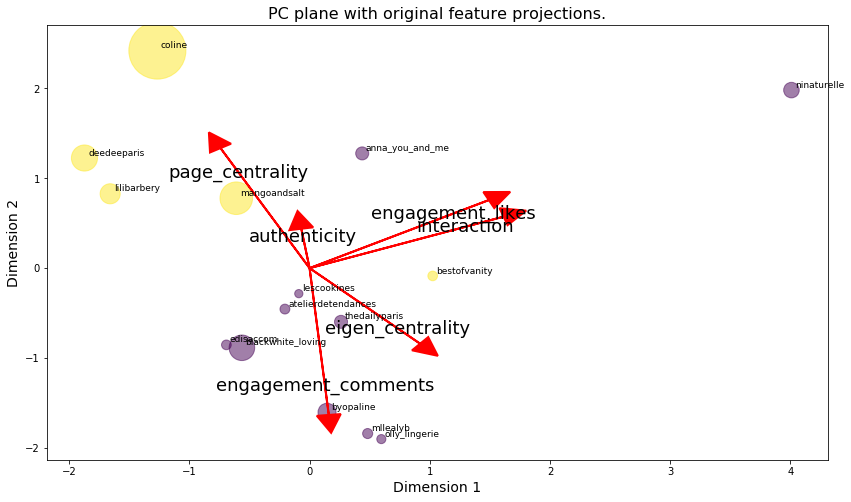

In [17]:
biplot(data, reduced_data, pca)
plt.show()

Refaire un biplot ici permet une meilleure visualisation avec moins de données. On remarque notamment que les utilisateurs retenus sont assez différents des uns des autres. Certains interagissent plus, d'autres sont plus centraux sur le graphe.

Pour terminer, on représente les utilisateurs dans les différentes dimensions

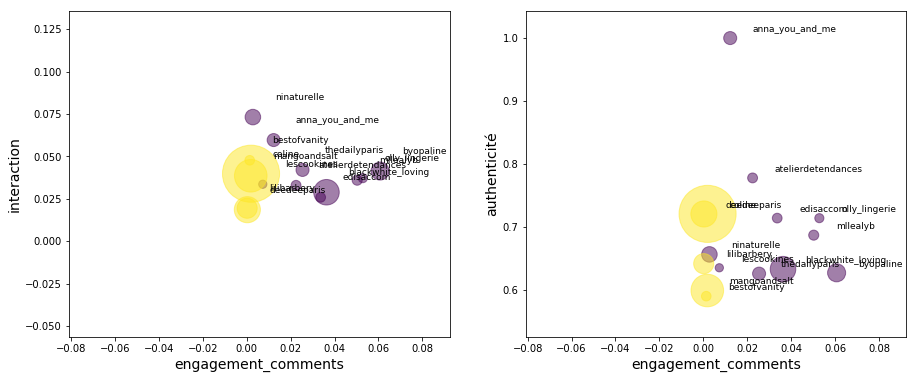

In [18]:
fig = plt.figure(figsize=(15, 6))


ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)



# Graphique 1
ax1.scatter(x=df_usr.loc[:, 'engagement_comments'], y=df_usr.loc[:, 'interaction'], c=colors, s=sizes, alpha=0.5)
types = list(col_names.values())
x1_coords = df_usr.loc[:, 'engagement_comments']
y1_coords = df_usr.loc[:, 'interaction']

for i,type in enumerate(types):
    x = x1_coords[i]
    y = y1_coords[i]
    ax1.text(x+0.01, y+0.01, type, fontsize=9)

ax1.set_xlabel("engagement_comments", fontsize=14)
ax1.set_ylabel("interaction", fontsize=14)

#Graphique 2
ax2.scatter(x=df_usr.loc[:, 'engagement_comments'], y=df_usr.loc[:, 'authenticity'], c=colors, s=sizes, alpha=0.5)
types = list(col_names.values())
x2_coords = df_usr.loc[:, 'engagement_comments']
y2_coords = df_usr.loc[:, 'authenticity']

for i,type in enumerate(types):
    x = x2_coords[i]
    y = y2_coords[i]
    ax2.text(x+0.01, y+0.01, type, fontsize=9)

ax2.set_xlabel("engagement_comments", fontsize=14)
ax2.set_ylabel("authenticité", fontsize=14)


plt.show()

In [19]:
# Calcul de la fréquence de publication

frequencies = pd.read_csv('posts_dataframe.csv')

col_names={}
for index in range(len(frequencies)):
    col_names[index]=list(frequencies.loc[index])[0]
frequencies=frequencies.rename(col_names,axis = 'index')
frequencies=frequencies.drop('users',axis = 1)

frequencies.head()

,post,caption,video,nb_com,nb_likes,date
bestofvanity,0.0,\ud83c\uddee\ud83c\uddf9 Si vous souhaitez vou...,False,6,385,2019-04-30 20:11:52
bestofvanity,1.0,L\u2019autre soir on a parl\u00e9 d\u2019Angle...,False,11,313,2019-04-25 10:01:55
bestofvanity,2.0,"Sur la C\u00f4te d\u2019Azur, il n\u2019y a pa...",False,9,402,2019-04-24 17:51:36
bestofvanity,3.0,\ud83c\udf3f Les jolies petites plantes des re...,False,10,476,2019-04-14 13:58:29
bestofvanity,4.0,\ud83c\udf74Qui vient d\u00eener ce soir ?\nPe...,False,9,263,2019-04-13 20:20:01


In [32]:
import datetime
frequencies_publi={}
for usr in list(key_users.keys()):

    dates=[]
    for item in list(frequencies['date'][usr]):
        dates.append(item)
    
        #On prend en compte la durée entre le plus ancien et le plus récent des posts
    
    dates=[datetime.datetime.strptime(date_initial, '%Y-%m-%d %H:%M:%S') for date_initial in dates]
    periode=str(max(dates)-min(dates))
    periode=periode[:periode.find(' day')]
    
    try: periode=int(periode)
    except: periode=1
        
    freq=len(list(frequencies['date'][usr]))/periode
    
    frequencies_publi[usr]=freq
    
frequencies_publi  

{'anna_you_and_me': 0.6666666666666666,
 'atelierdetendances': 0.5217391304347826,
 'bestofvanity': 0.1875,
 'blackwhite_loving': 3.0,
 'byopaline': 2.0,
 'coline': 0.3870967741935484,
 'deedeeparis': 0.04501607717041801,
 'edisaccom': 0.6,
 'lescookines': 1.7142857142857142,
 'lilibarbery': 0.05855855855855856,
 'mangoandsalt': 0.3157894736842105,
 'mllealyb': 1.0909090909090908,
 'ninaturelle': 0.1791044776119403,
 'olly_lingerie': 1.0,
 'thedailyparis': 0.4444444444444444}

In [34]:
import pandas as pd


df_usr = df_usr.assign(frequency=pd.Series(frequencies_publi).values)
df_usr


,eigen_centrality,page_centrality,engagement_comments,engagement_likes,authenticity,interaction,frequency
olly_lingerie,0.047886,0.000000,0.052861,0.498155,0.714171,0.037186,1.000000
mllealyb,0.044947,0.000000,0.050302,0.365332,0.687199,0.035985,1.090909
ninaturelle,0.025950,0.000007,0.002799,165.025595,0.656657,0.073231,0.179104
blackwhite_loving,0.014982,0.000007,0.036313,0.195066,0.633201,0.028881,3.000000
lescookines,0.025950,0.000000,0.007308,1.348112,0.635433,0.033599,1.714286
atelierdetendances,0.021936,0.000000,0.022460,0.173113,0.778052,0.032972,0.521739
thedailyparis,0.018997,0.000000,0.025413,3.206785,0.626153,0.042040,0.444444
anna_you_and_me,0.000000,0.000006,0.012261,0.224729,1.000000,0.059675,0.666667
byopaline,0.010968,0.000000,0.060725,0.208883,0.627429,0.041395,2.000000
edisaccom,0.010968,0.000000,0.033671,0.121617,0.714248,0.025885,0.600000


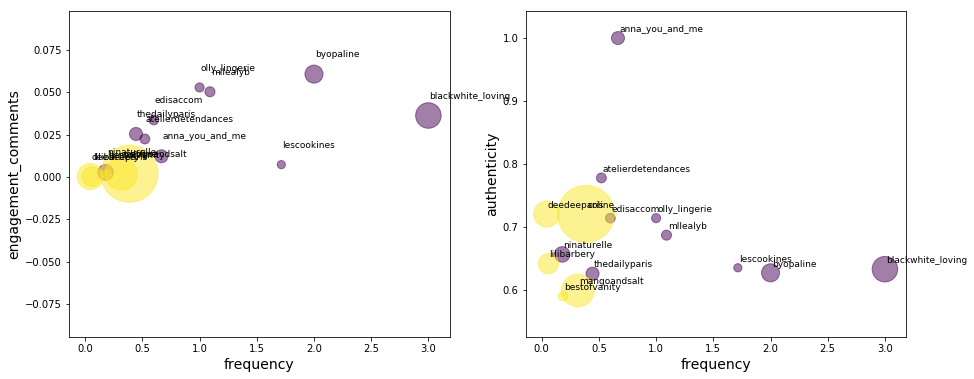

In [37]:
fig = plt.figure(figsize=(15, 6))


ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)



# Graphique 1
ax1.scatter(x=df_usr.loc[:, 'frequency'], y=df_usr.loc[:, 'engagement_comments'], c=colors, s=sizes, alpha=0.5)
types = list(col_names.values())
x1_coords = df_usr.loc[:, 'frequency']
y1_coords = df_usr.loc[:, 'engagement_comments']

for i,type in enumerate(types):
    x = x1_coords[i]
    y = y1_coords[i]
    ax1.text(x+0.01, y+0.01, type, fontsize=9)

ax1.set_xlabel("frequency", fontsize=14)
ax1.set_ylabel("engagement_comments", fontsize=14)

#Graphique 2
ax2.scatter(x=df_usr.loc[:, 'frequency'], y=df_usr.loc[:, 'authenticity'], c=colors, s=sizes, alpha=0.5)
types = list(col_names.values())
x2_coords = df_usr.loc[:, 'frequency']
y2_coords = df_usr.loc[:, 'authenticity']

for i,type in enumerate(types):
    x = x2_coords[i]
    y = y2_coords[i]
    ax2.text(x+0.01, y+0.01, type, fontsize=9)

ax2.set_xlabel("frequency", fontsize=14)
ax2.set_ylabel("authenticity", fontsize=14)


plt.show()